In [170]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


INDICATORS = "../dataset/indicators.csv"
INDICATORS_NO_OUTLIER = "../dataset/indicators_no_outlier.csv"
NO_OUTLIER = "../dataset/customer_supermarket_no_outlier.csv"

In [171]:
ind_no_outlier = pd.read_csv(INDICATORS_NO_OUTLIER, index_col='CustomerID')
ind_no_outlier = ind_no_outlier.loc[:, ~ind_no_outlier.columns.str.contains('^Unnamed')]
#ind_no_outlier.CustomerID = ind_no_outlier.CustomerID.astype(int)
print(ind_no_outlier.head())
print(ind_no_outlier.info())

            Entropy     i   iu  imax  tot_sales  mean_sales
CustomerID                                                 
12347       1.94591  2458  103   319     481.21   68.744286
12350      -0.00000   197   17   197      65.30   65.300000
12352       1.94591   470   58    98     497.12   71.017143
12353      -0.00000    20    4    20      24.30   24.300000
12355      -0.00000   240   13   240      54.65   54.650000
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4149 entries, 12347 to 18287
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Entropy     4149 non-null   float64
 1   i           4149 non-null   int64  
 2   iu          4149 non-null   int64  
 3   imax        4149 non-null   int64  
 4   tot_sales   4149 non-null   float64
 5   mean_sales  4149 non-null   float64
dtypes: float64(3), int64(3)
memory usage: 226.9 KB
None


### Scaling values in order to avoid bias by using a standard scaler

In [172]:
#ind_no_outlier = ind_no_outlier.drop(['Entropy'], axis=1)

In [173]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [174]:
scaler = MinMaxScaler()
# we could also try with the standard scaler
scaler.fit(ind_no_outlier.values)

MinMaxScaler()

In [175]:
ind_no_outlier.head().values

array([[ 1.94591015e+00,  2.45800000e+03,  1.03000000e+02,
         3.19000000e+02,  4.81210000e+02,  6.87442857e+01],
       [-0.00000000e+00,  1.97000000e+02,  1.70000000e+01,
         1.97000000e+02,  6.53000000e+01,  6.53000000e+01],
       [ 1.94591015e+00,  4.70000000e+02,  5.80000000e+01,
         9.80000000e+01,  4.97120000e+02,  7.10171429e+01],
       [-0.00000000e+00,  2.00000000e+01,  4.00000000e+00,
         2.00000000e+01,  2.43000000e+01,  2.43000000e+01],
       [-0.00000000e+00,  2.40000000e+02,  1.30000000e+01,
         2.40000000e+02,  5.46500000e+01,  5.46500000e+01]])

In [176]:
scaler.transform(ind_no_outlier.head().values)

array([[0.5481051 , 0.18668794, 0.32484076, 0.2706383 , 0.22446304,
        0.28084361],
       [0.        , 0.01489249, 0.05095541, 0.16680851, 0.03039098,
        0.26673765],
       [0.5481051 , 0.03563559, 0.18152866, 0.08255319, 0.23188697,
        0.29015201],
       [0.        , 0.00144366, 0.00955414, 0.01617021, 0.01125955,
        0.09882358],
       [0.        , 0.01815971, 0.03821656, 0.20340426, 0.02542147,
        0.22312095]])

In [177]:
X = scaler.fit_transform(ind_no_outlier.values)

## K-Means

In [178]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [179]:
for i in range(2,10):
    kmeans = KMeans(n_clusters=i, n_init=10, max_iter=150)
    kmeans.fit(X)
    labels = kmeans.labels_
    print(silhouette_score(X, labels, metric='euclidean'))

0.3951750618890798
0.30588226842967803
0.3254372590353629
0.33185926192894666
0.3026261362641669
0.304427096661461
0.286113264530977
0.2808992603003916


In [180]:
kmeans = KMeans(n_clusters=2, n_init=10, max_iter=150)
kmeans.fit(X)
labels = kmeans.labels_

In [181]:
kmeans.labels_

array([0, 1, 0, ..., 1, 0, 1], dtype=int32)

size of each cluster

In [182]:
np.unique(kmeans.labels_, return_counts=True)

(array([0, 1], dtype=int32), array([1219, 2930]))

In [183]:
hist, bins = np.histogram(kmeans.labels_, 
                          bins=range(0, len(set(kmeans.labels_)) + 1))
dict(zip(bins, hist))

{0: 1219, 1: 2930}

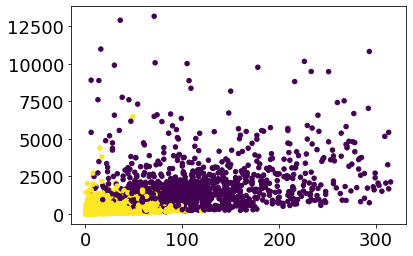

In [184]:
plt.scatter(ind_no_outlier['iu'], ind_no_outlier['i'], 
            c=kmeans.labels_, s=20)
plt.tick_params(labelsize=18)
plt.show()

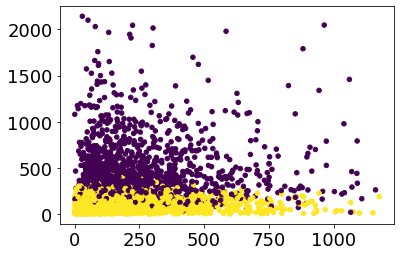

In [185]:
plt.scatter(ind_no_outlier['imax'], ind_no_outlier['tot_sales'], 
            c=kmeans.labels_, s=20)
plt.tick_params(labelsize=18)
plt.show()

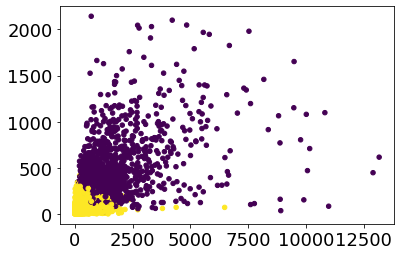

In [186]:
plt.scatter(ind_no_outlier['i'], ind_no_outlier['tot_sales'], 
            c=kmeans.labels_, s=20)
plt.tick_params(labelsize=18)
plt.show()

In [187]:
"""plt.scatter(ind['iu'], ind['Entropy'], 
            c=kmeans.labels_, s=20)
plt.tick_params(labelsize=18)
plt.show()"""

"plt.scatter(ind['iu'], ind['Entropy'], \n            c=kmeans.labels_, s=20)\nplt.tick_params(labelsize=18)\nplt.show()"

In [188]:
"""plt.scatter(ind['Sale'], ind['Entropy'], 
            c=kmeans.labels_, s=20)
plt.tick_params(labelsize=18)
plt.show()"""

"plt.scatter(ind['Sale'], ind['Entropy'], \n            c=kmeans.labels_, s=20)\nplt.tick_params(labelsize=18)\nplt.show()"

In [189]:
kmeans.cluster_centers_

array([[0.52757138, 0.13674432, 0.3699458 , 0.22361301, 0.23372689,
        0.30829164],
       [0.13403339, 0.02402897, 0.08359438, 0.15168847, 0.04276924,
        0.22085805]])

### Cluster Centers visualization

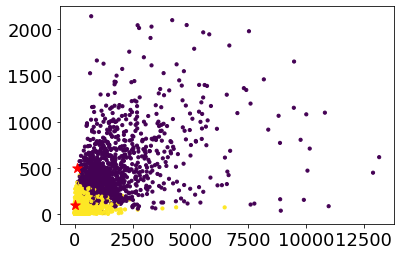

[117.16298116  27.24863388] 
 [501.06309582  91.82748395]


In [190]:
centers = scaler.inverse_transform(kmeans.cluster_centers_)
plt.scatter(ind_no_outlier['i'], ind_no_outlier['tot_sales'], c=kmeans.labels_, 
            s=10)
plt.scatter(centers[:, 2], centers[:, 4], s=100, marker='*', c='r')
plt.tick_params(axis='both', which='major', labelsize=18)
plt.show()

print(centers[:, 2], "\n", centers[:, 4])

### Cluster Centers as parallel coordinates

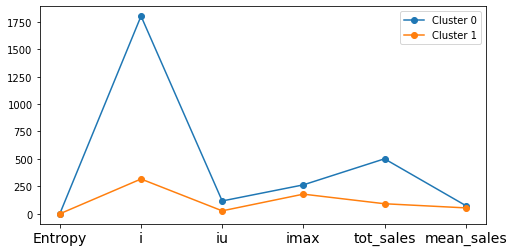

In [191]:
plt.figure(figsize=(8, 4))
for i in range(0, len(centers)):
    plt.plot(centers[i], marker='o', label='Cluster %s' % i)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.xticks(range(0, len(ind_no_outlier.columns)), ind_no_outlier.columns, fontsize=14)
plt.legend(fontsize=10)
plt.show()

### Centroids radar chart

In [192]:
from math import pi
 
# number of variable
N = len(ind_no_ent.columns)
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
for i in range(0, len(centers)):
    angles = [n / float(N) * 2 * pi for n in range(N)]
    values = centers[i].tolist()
    values += values[:1]
    angles += angles[:1]
    # Initialise the spider plot
    ax = plt.subplot(polar=True)
# Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], ind_no_ent.columns, color='grey', size=8) 
# Plot data
    ax.plot(angles, values, linewidth=1, linestyle='solid')
 # Fill area
    ax.fill(angles, values, 'b', alpha=0.1)


NameError: name 'ind_no_ent' is not defined

### SSE and Clustering Validation

In [ ]:
from sklearn import metrics
print('SSE %s' % kmeans.inertia_)
print('Silhouette %s' % silhouette_score(X, kmeans.labels_))
print('Separation %s' % metrics.davies_bouldin_score(X, kmeans.labels_))

In [ ]:
ind

In [ ]:
sale_xt_pct = pd.crosstab(kmeans.labels_,ind['Sale'])
ccountry_xt_pct = pd.crosstab(kmeans.labels_,ind['CustomerCountry'])
iu_xt_pct = pd.crosstab(kmeans.labels_,ind["iu"])

In [ ]:
ccountry_xt_pct.plot(kind='bar', stacked=False, 
                   title='Sale per cluster')
plt.xlabel('Cluster')
plt.ylabel('Country')
plt.show()

# no, così non funziona, dobbiamo trovare degli indicatori categorici 
# (tipo calcolarci noi se un cliente è highly spending eccetera)

In [ ]:
"""sale_xt_pct.plot(kind='bar', stacked=False, 
                   title='Sale per cluster')
plt.xlabel('Cluster')
plt.ylabel('Sale')
plt.show()"""

Computing the best K

In [ ]:
sse_list = list()
max_k = 40
for k in range(2, max_k + 1):
    kmeans = KMeans(n_clusters=k, n_init=10, max_iter=100)
    kmeans.fit(X)
    
    sse = kmeans.inertia_
    sse_list.append(sse)

In [ ]:
plt.plot(range(2, len(sse_list) + 2), sse_list)
plt.ylabel('SSE', fontsize=22)
plt.xlabel('K', fontsize=22)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.show()

Best K seems to be 5 or 6

In [ ]:
#Similarity between assignments
i = ind.i
metrics.adjusted_rand_score(i, kmeans.labels_)

## DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
dbscan = DBSCAN(eps=0.07, min_samples=3)
dbscan.fit(X)

In [ ]:
dbscan.labels_

In [ ]:
np.unique(dbscan.labels_, return_counts=True)

In [ ]:
plt.scatter(ind_no_ent['iu'], ind_no_ent['Sale'], 
            c=dbscan.labels_, s=20)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.show()

In [ ]:
print('Silhouette %s' % silhouette_score(X, dbscan.labels_))

Best eps with knee method

In [ ]:
from scipy.spatial.distance import pdist, squareform

In [ ]:
dist = pdist(X, 'euclidean') #pair wise distance
print (dist)
dist = squareform(dist) #distance matrix given the vector dist
print()
print(dist)

In [ ]:
k = 3
kth_distances = list()
for d in dist:
    index_kth_distance = np.argsort(d)[k]
    kth_distances.append(d[index_kth_distance])

In [ ]:
plt.plot(range(0, len(kth_distances)), sorted(kth_distances))
plt.ylabel('dist from %sth neighbor' % k, fontsize=18)
plt.xlabel('sorted distances', fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.show()

## Hierarchical clustering

In [ ]:
from scipy.stats import mode
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram

In [ ]:
data_dist = pdist(X, metric='euclidean')
data_link = linkage(data_dist, method='complete', metric='euclidean')
res = dendrogram(data_link, color_threshold=1.0, truncate_mode='lastp')

In [ ]:
data_dist = pdist(X, metric='euclidean')
data_link = linkage(data_dist, method='single', metric='euclidean')
res = dendrogram(data_link, color_threshold=0.2, truncate_mode='lastp')

In [ ]:
data_dist = pdist(X, metric='euclidean')
data_link = linkage(data_dist, method='average', metric='euclidean')
res = dendrogram(data_link, color_threshold=1, truncate_mode='lastp')